In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Python random

#### random.randint(a,b)

生成**\[a,b]**范围内的一个随机整数。

**<u>注意</u>** 和numpy.randint(a,b)的区别， numpy.randint是\[a,b)区间内的随机整数。

In [2]:
import random

k = random.randint(0,2)
k 

0

### numpy random data generation

#### numpy.random.rand(d0,d1,...,dn) 用来生成d0 x d1 x ... x dn 维的数组，数组的值在 \[0,1)之间。

In [3]:
import numpy as np

np.random.rand(3,2,2)

array([[[0.61972143, 0.60637444],
        [0.96649017, 0.76539331]],

       [[0.71927516, 0.12240495],
        [0.07074832, 0.32132996]],

       [[0.95983603, 0.35738735],
        [0.60727893, 0.97932041]]])

In [26]:
np.random.seed(1)
arr = np.random.rand(3)
arr
np.random.seed(1)
arr = np.random.rand(3)
arr

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

#### numpy.random.randn(d0, d1, ..., dn) 用来生成d0 x d1 x ... x dn 维的数组，数组的值服从$N(0，1)$ 的标准正态分布

In [5]:
np.random.randn(3,2)

array([[-0.80217284, -0.44887781],
       [-1.10593508, -1.65451545],
       [-2.3634686 ,  1.13534535]])

如果需要服从$N(\mu,\sigma^2)$ 的正态分布，只需在randn上每个生成的值x上做变换 $\sigma * x + u$ 即可。

In [6]:
# N(1,4) 的抽样数据
2 * np.random.randn(3,2) + 1

array([[-1.03402827,  2.27472363],
       [-0.71981321,  4.54521526],
       [-1.22072611,  1.36242853]])

#### numpy.random.normal(local, scale, size)生成指定均值和标准差的正态分布随机数；

In [7]:
arr = np.random.normal(loc=2, scale=0.5, size=(3,2))
arr


array([[2.28217243, 1.71674489],
       [2.3649878 , 2.18649689],
       [2.26690546, 1.95401335]])

In [24]:
noise = np.random.normal(0, 0.1)    # 生成均值为0， 标准差为0.1的一个随机数
noise

0.005766532093133092

#### randint(low\[,high,size]) 生成随机的大小为size的数据，size可以为整数，为矩阵维数，或者张量的维数。值位于半开区间[low, high)

In [8]:
# 维数为3x2的数据，取值范围为最大值为3的整数
np.random.randint(3, size=(3,2))

array([[1, 0],
       [0, 1],
       [0, 2]])

In [9]:
# data range [3,6), dimension 2x2
np.random.randint(3,6, size=(2,2))

array([[3, 3],
       [4, 4]])

#### random_integers(low\[, high, size]) 和randint()类似，区别在于取值范围是闭区间[low, high]

In [10]:
np.random.random_integers(3,6,size=(2,2))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(3, 6 + 1) instead
  """Entry point for launching an IPython kernel.


array([[5, 6],
       [3, 3]])

#### random_sample([size]), 返回随机的浮点数，在半开区间\[0.0, 1.0)。如果是其他区间[a,b)， 可以加上变换$(b-a) * random\_sample([2])+ a$

In [11]:
(5-2) * np.random.random_sample([2,2]) + 2

array([[2.89548588, 3.33840352],
       [2.66637364, 2.22009252]])

#### np.random.uniform(low, high, size) , \[low,high)

In [12]:
arr = np.random.uniform(1,10,size=(2,4))
arr

array([[5.22314674, 1.86555034, 9.1303315 , 2.07541421],
       [5.72319439, 1.75260704, 9.25175201, 9.19403544]])

#### np.random.shuffle(arr) 打乱数组顺序,原地操作数组

In [13]:
arr = np.arange(10)
np.random.shuffle(arr)
arr

array([8, 0, 6, 5, 2, 4, 3, 1, 9, 7])

#### np.random.choice(arr, size, p)按照指定概率从指定数组中，生成size大小的随机数

In [14]:
arr = np.random.choice([1,2,3,4], size = 10,p=[0.1,0.2,0.3,0.4])
arr

array([2, 3, 4, 3, 1, 3, 4, 3, 4, 3])

In [15]:
# 进行10000次重复实验，检测每一个数，被抽出的概率
ls1 = [0,0,0,0]
for i in range(10000):
    f = np.random.choice([1,2,3,4], p=[0.1,0.2,0.3,0.4])
    ls1[f-1] = ls1[f-1] + 1

ls1
result_ls = [value/sum(ls1) for value in ls1]
result_ls

[997, 2063, 2984, 3956]

[0.0997, 0.2063, 0.2984, 0.3956]

In [16]:
# 模拟100000次掷硬币重复实现，检测每一面，被抽取到的概率
ls1 = [0,0]
for i in range(10000):
    f = np.random.choice([0,1], p=[0.5,0.5])
    ls1[f] = ls1[f] + 1

ls1
result_ls = [value/sum(ls1) for value in ls1]
result_ls

[4903, 5097]

[0.4903, 0.5097]

### scikit-learn 随机数生成

都在datasets类中，和numpy比起来，可以用来生成适合特定机器学习模型的数据。常见的有：
- make_regression 生成回归模型的数据；
- make_hastie_10_2, make_classification, or make_multilabel_classification 生成分类模型数据
- make_blobs生成聚类模型数据；
- make_gaussian_quantiles生成分组多维正态分布的数据

#### make_regression 回归模型随机数据

make_regression 的几个关键参数有: n_samples(生成样本数)，n_features(样本特征数), noise(样本随机噪音), coef(是否返回回归系数）。

函数的输出按顺序为：样本特征(X)、样本输出(y)、回归系数(coef)。

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


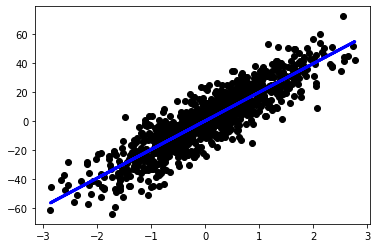

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_regression

X, y, coef = make_regression(n_samples = 1000, n_features = 1, noise = 10, coef = True)

# draw
plt.scatter(X, y, color = 'black')
plt.plot(X, X*coef, color = 'blue', linewidth = 3)

plt.xticks()
plt.yticks()

plt.show();

#### make_classification分类模型随机数据

make_classification 的几个关键参数有： **n_samples(生成样本数)、n_features(样本特征数)、n_redundant(冗余特征数)、n_classes(输出的类别数）。**

函数的输出按顺序为：X1为样本特征，Y1为样本类别输出。


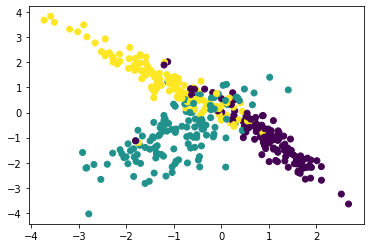

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification

# X1 为样本特征，Y1为样本类别输出，共400个样本，每个样本2个特征，输出有3个类别，没有冗余特征，每个类别一个簇
X1, Y1 = make_classification(n_samples = 400, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, n_classes = 3)

# draw
plt.scatter(X1[:,0], X1[:,1], marker = 'o', c =  Y1)
plt.show()

#### make_blobs聚类模型随机数据

make_blobs 的关键参数有 **n_samples(生成样本数)、n_features(样本特征数)、centers(簇中心的个数或者自定义的簇中心)、cluster_std(簇中心方差，代表簇的聚合程度)。**

函数的输出按顺序为：X为样本特征，Y为样本簇类别。

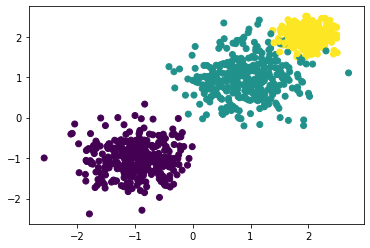

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# X为样本特征，y为样本簇类别，共1000个样本，每个样本2个特征，共三个簇，中心分别在 [-1, -1], [1,1], [2,2], 簇方差分别为 [0.4, 0.5, 0.2]
X, y = make_blobs(n_samples = 1000, n_features = 2, centers= [[-1, -1], [1,1], [2,2]], cluster_std = [0.4, 0.5, 0.2])

# draw
plt.scatter(X[:,0], X[:,1], marker = 'o', c =  y)
plt.show()

#### make_gaussian_quantiles分组正态分布混合数据

make_gaussian_quantiles 的几个关键参数有**n_samples(生成样本数)、n_features(样本特征数)、mean(特征均值), cov(样本写方差的系数), n_classes(数据在正态分布中按分位数分配的组数）。**


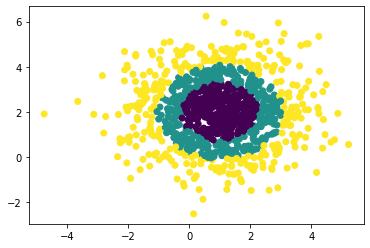

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_gaussian_quantiles

X1, Y1 = make_gaussian_quantiles(n_samples = 1000, n_features = 2, n_classes = 3, mean= [1,2], cov=2)


# draw
plt.scatter(X1[:,0], X1[:,1], marker = 'o', c =  Y1)
plt.show()